In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dailynews/analyst_ratings_processed.csv')

In [8]:
df = df.dropna() # delete missing rows
df.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [9]:
print("{} pieces of data totally".format(len(df.index)))

1397891 pieces of data totally


## Analysis stock

In [13]:
stock = df['stock'].to_numpy()

In [14]:
stock_set = set(stock)
print("{} different stocks totally".format(len(stock_set)))

6192 different stocks totally


In [16]:
stock_count = {}
for s in stock_set:
    count = (df.stock.values == s).sum()
#     if count == 0:
#         print(s)
    stock_count[s] = count

In [17]:
max_ = max(stock_count.values())
max_stock = list(stock_count.keys())[list(stock_count.values()).index(max_)]
print("{} has largest pieces of data: {}".format(max_stock, max_))

MRK has largest pieces of data: 3334


In [18]:
min_ = min(stock_count.values())
print(min_)
min_stock = list(stock_count.keys())[list(stock_count.values()).index(min_)]
print("{} has smallest pieces of data: {}".format(min_stock, min_))

1
FTSM has smallest pieces of data: 1


In [23]:
print("each stock has {} pieces on average".format(np.mean(list(stock_count.values()))))

each stock has 225.7575904392765 pieces on average


In [26]:
print("median {} pieces".format(np.median(list(stock_count.values()))))

median 109.0 pieces


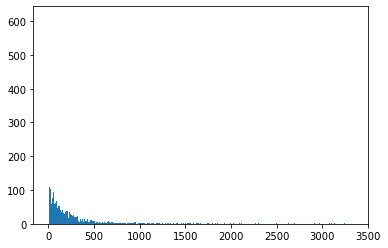

In [25]:
import matplotlib.pyplot as plt

plt.hist(list(stock_count.values()), bins=len(set(list(stock_count.values()))))
plt.show()

Check csv directly, we can find the dailynews is not continuous. For example, there are some news in 2019-01-01 for a stock, and some others in 2019-01-04, but there is no news in 2019-01-03. Each stock has a different range of date.